In this project we have decided to look at different researches existing in the area of car price prediction and recreate the undertaken approaches to see how we could improve them and whether we would come to the same conclusion, even while using different datasets. We based our research on:
- [Nyenish09: Prediction of Automobile price in R](https://rpubs.com/nyenish09/857875?fbclid=IwZXh0bgNhZW0CMTAAAR0xa4yHuh6rJ4q9mXB7C6F00_IWrWAg56DjRR_hEUxXCKjYjYH6uMYs9bY_aem_AdwV_YdZ7TRgWutk8yl2TEgrrTSeC5wXkclRwegVv4qp9WpB_tF_Bz9USAzGaIfi1cTHo9TWXPfcH4GoJ_J1fHzG)
- [PyMati: Car Price Prediction in Python](https://github.com/PyMati/Car-Price-Prediction-Regression/blob/main/Car-Price-Regression-Model-Notebook.ipynb)
- [Suhasmadalli: Car-Prices-Prediction in Python](https://github.com/suhasmaddali/Car-Prices-Prediction/tree/main)

Importing Needed packages

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os 
import logging
import datetime
import sys

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from functions.modelling import *


START OF CLEANING

In order to ensure reproducibility, all data cleaning steps have benn packed into a data_cleaning.py file where we can easily parse the data to.


END OF CLEANING

In [115]:
df = pd.read_csv('data/alternative_cleaning/alternative_cleaning.csv.gz', compression='gzip')
df_charts = pd.read_csv('data/alternative_EDA_cleaning.csv.gz', compression='gzip')

In [24]:
df_charts.head(5)

,brand,year_production,mileage,engine_capacity,fuel_type,power,automatic_gearbox,drive_type,body_type,doors,color,accident_free,condition,price,currency
0,Alfa Romeo,2012,104965,1368,Benzyna,105,0,Front_wheel_drive,Small_cars,3.0,Beige,1,Used_cars,17000,PLN
1,Alfa Romeo,2011,230500,1956,Diesel,136,0,Front_wheel_drive,Combi,4.0,Red,1,Used_cars,35000,PLN
2,Alfa Romeo,2010,182000,1742,Benzyna,235,0,Front_wheel_drive,Compact,5.0,Brown,0,Used_cars,34900,PLN
3,Alfa Romeo,2007,263773,2387,Diesel,200,0,Front_wheel_drive,Combi,4.0,Brown,1,Used_cars,18000,PLN
4,Alfa Romeo,2009,292000,1910,Diesel,150,0,Front_wheel_drive,Compact,4.0,Black,1,Used_cars,11500,PLN


As for our analysis we would like to focus on 3 different factors:
- Similarity of the datasets, distributions and tendencies within the data
- Similarity between the features of the data
- Accuracy of the chosen models and the predictions

### Exploratory Data Analysis

#### Distribution of car companies cars'

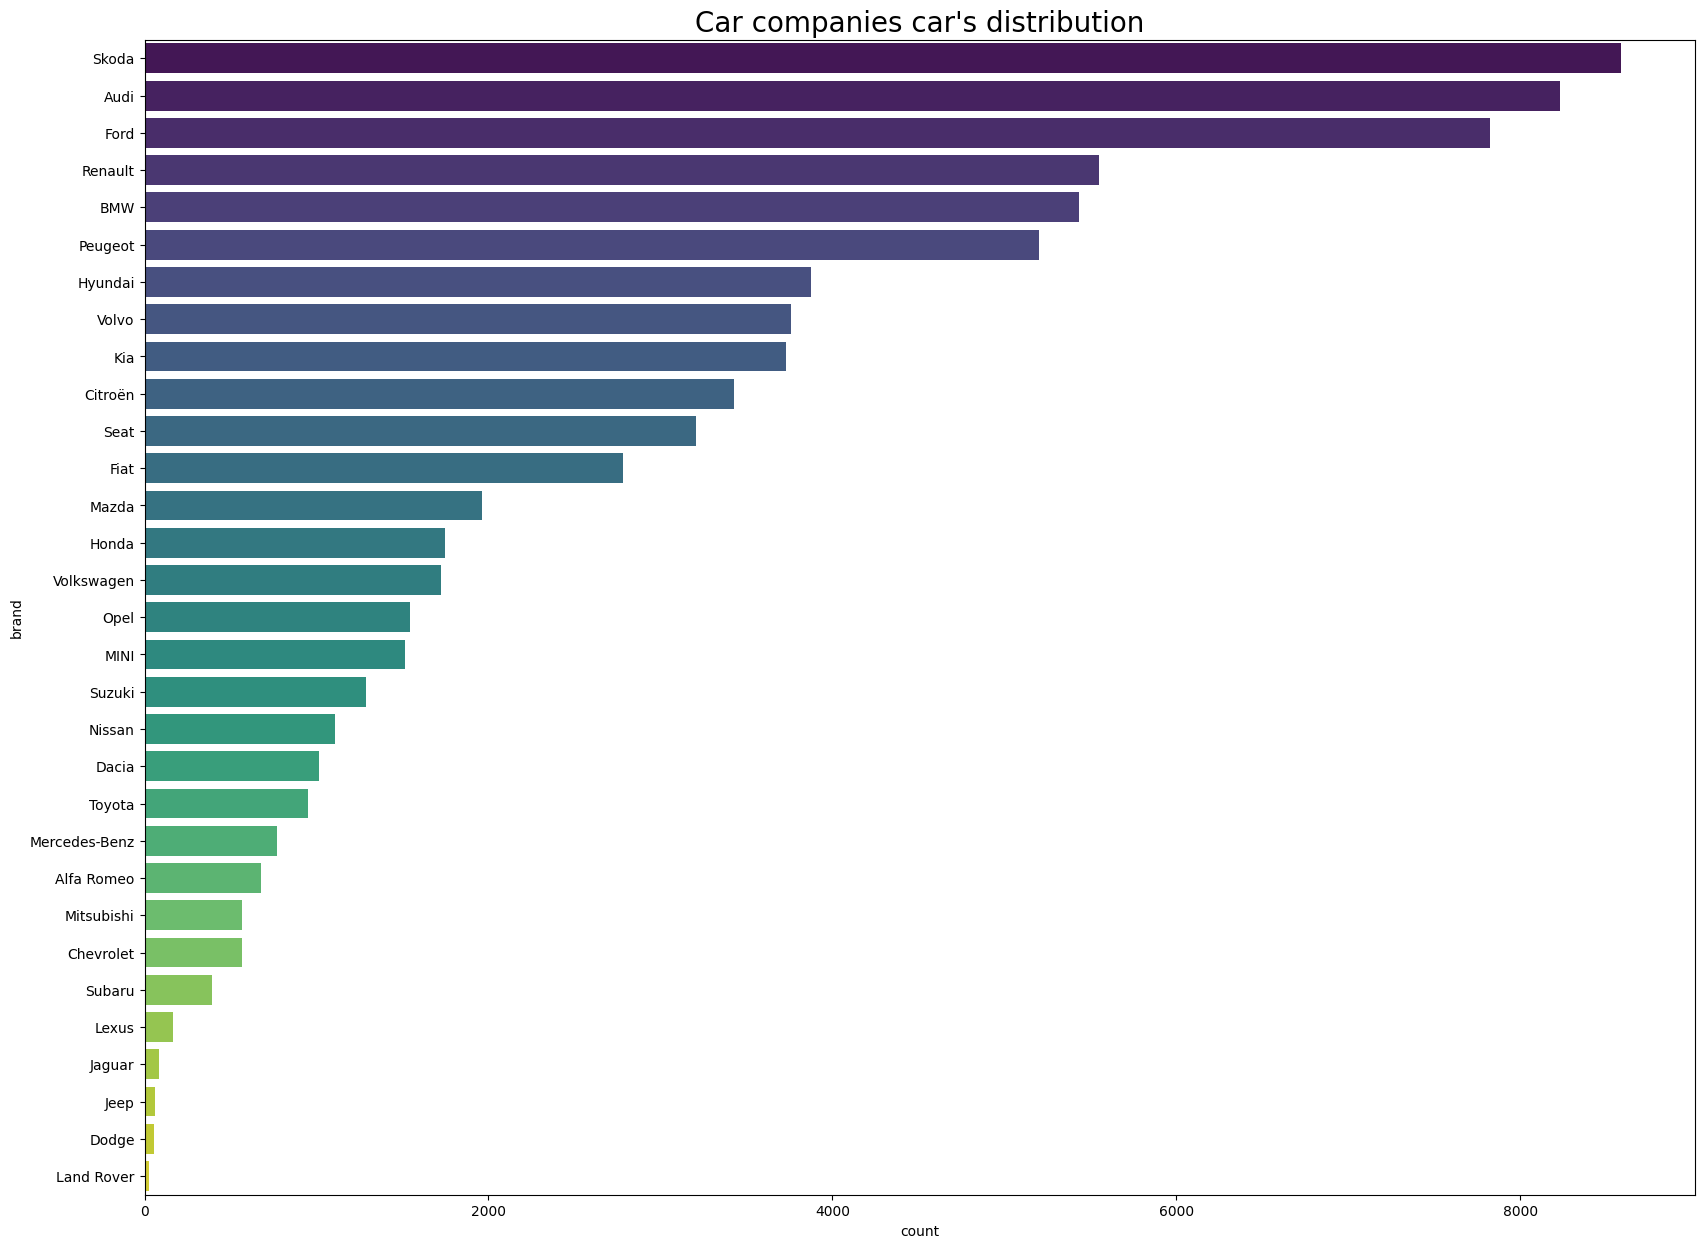

In [116]:
plt.figure(figsize=(20, 15))
sns.countplot(y = df_charts.brand, order = df_charts.brand.value_counts().index, palette = 'viridis')
plt.title("Car companies car's distribution", fontsize = 20)
plt.show()

#### Distribution of cars' production year

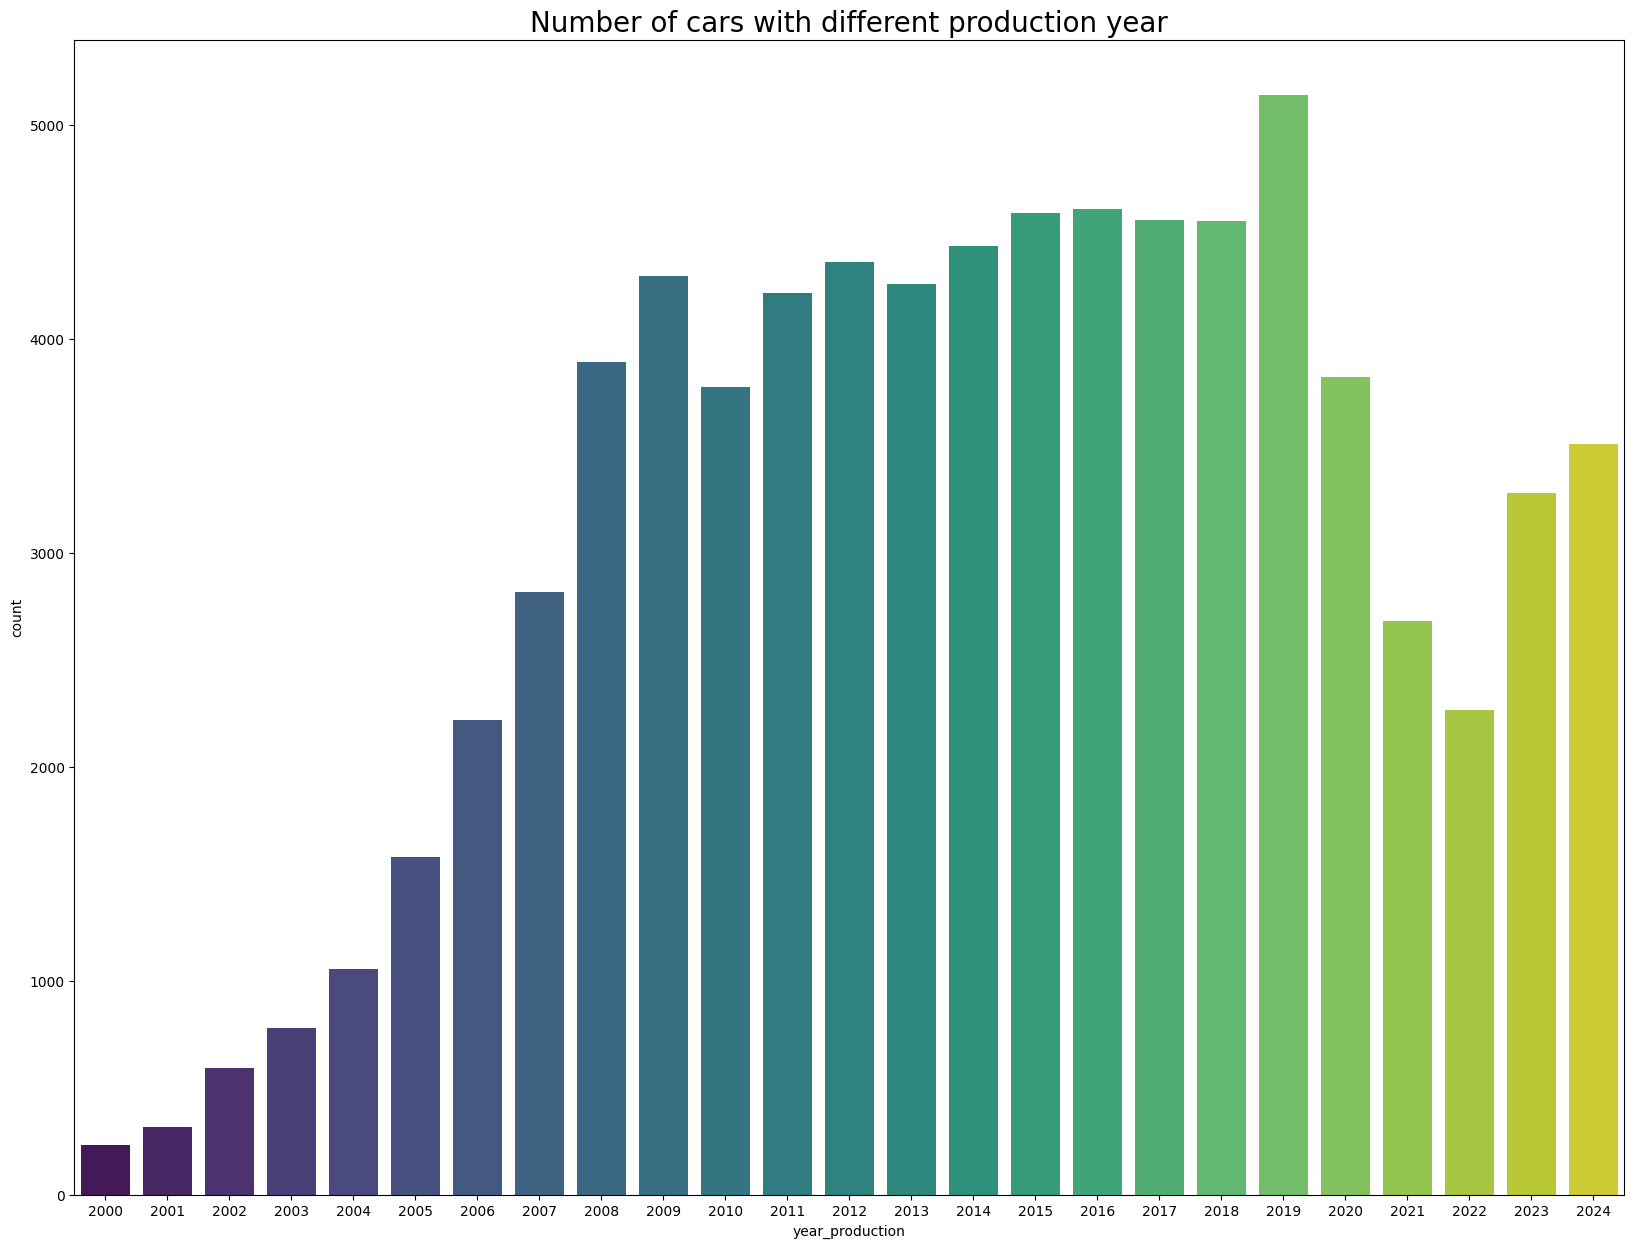

In [117]:
plt.figure(figsize = (20, 15))
sns.countplot(x = df_charts.year_production, palette = 'viridis')
plt.title("Number of cars with different production year", fontsize = 20)
plt.show()

#### Distribution of fuel type

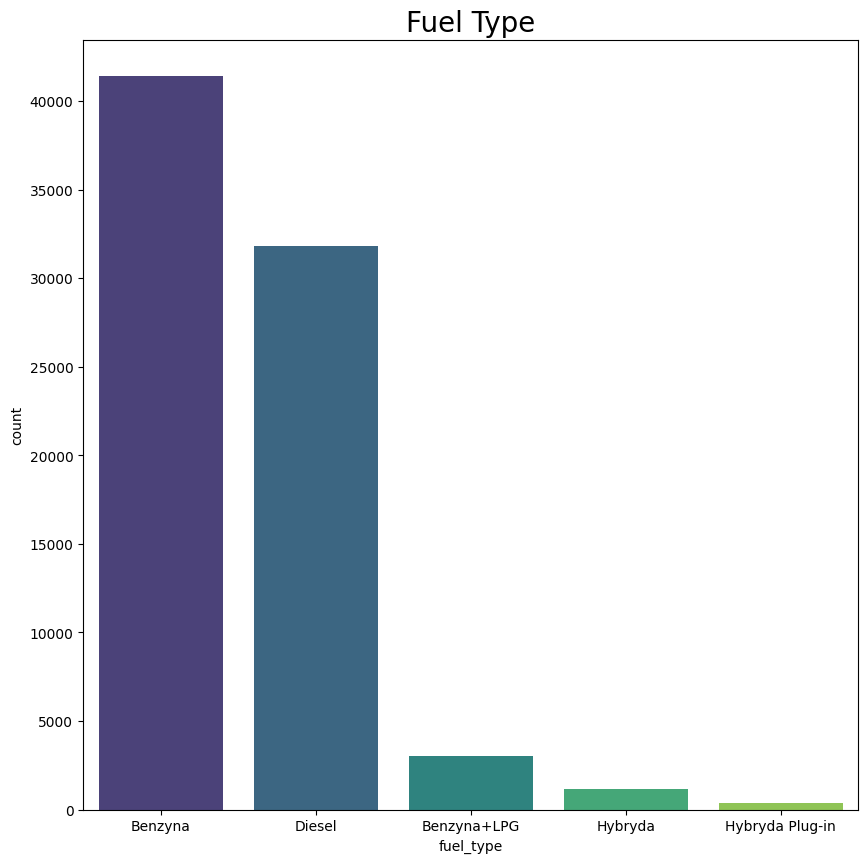

In [118]:
plt.figure(figsize = (10, 10))
sns.countplot(x=df_charts['fuel_type'], palette = 'viridis')
plt.title("Fuel Type", fontsize = 20)
plt.show()

#### Distribution of car type

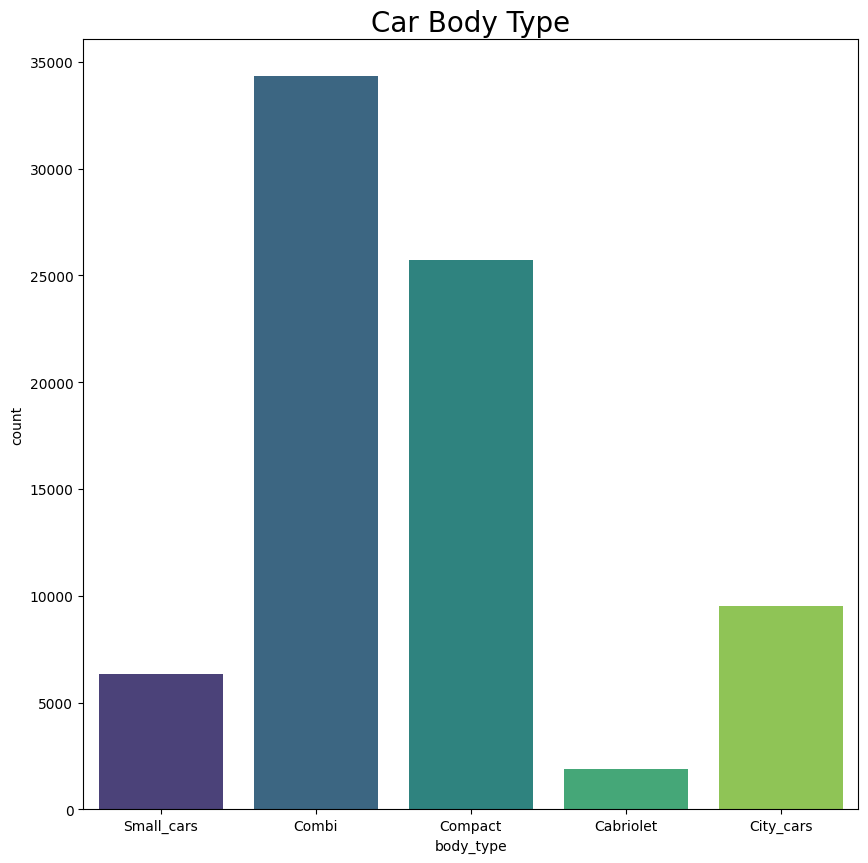

In [121]:
plt.figure(figsize = (10, 10))
sns.countplot(x=df_charts['body_type'], palette = 'viridis')
plt.title("Car Body Type", fontsize = 20)
plt.show()

#### Average Price of cars depending on their production year

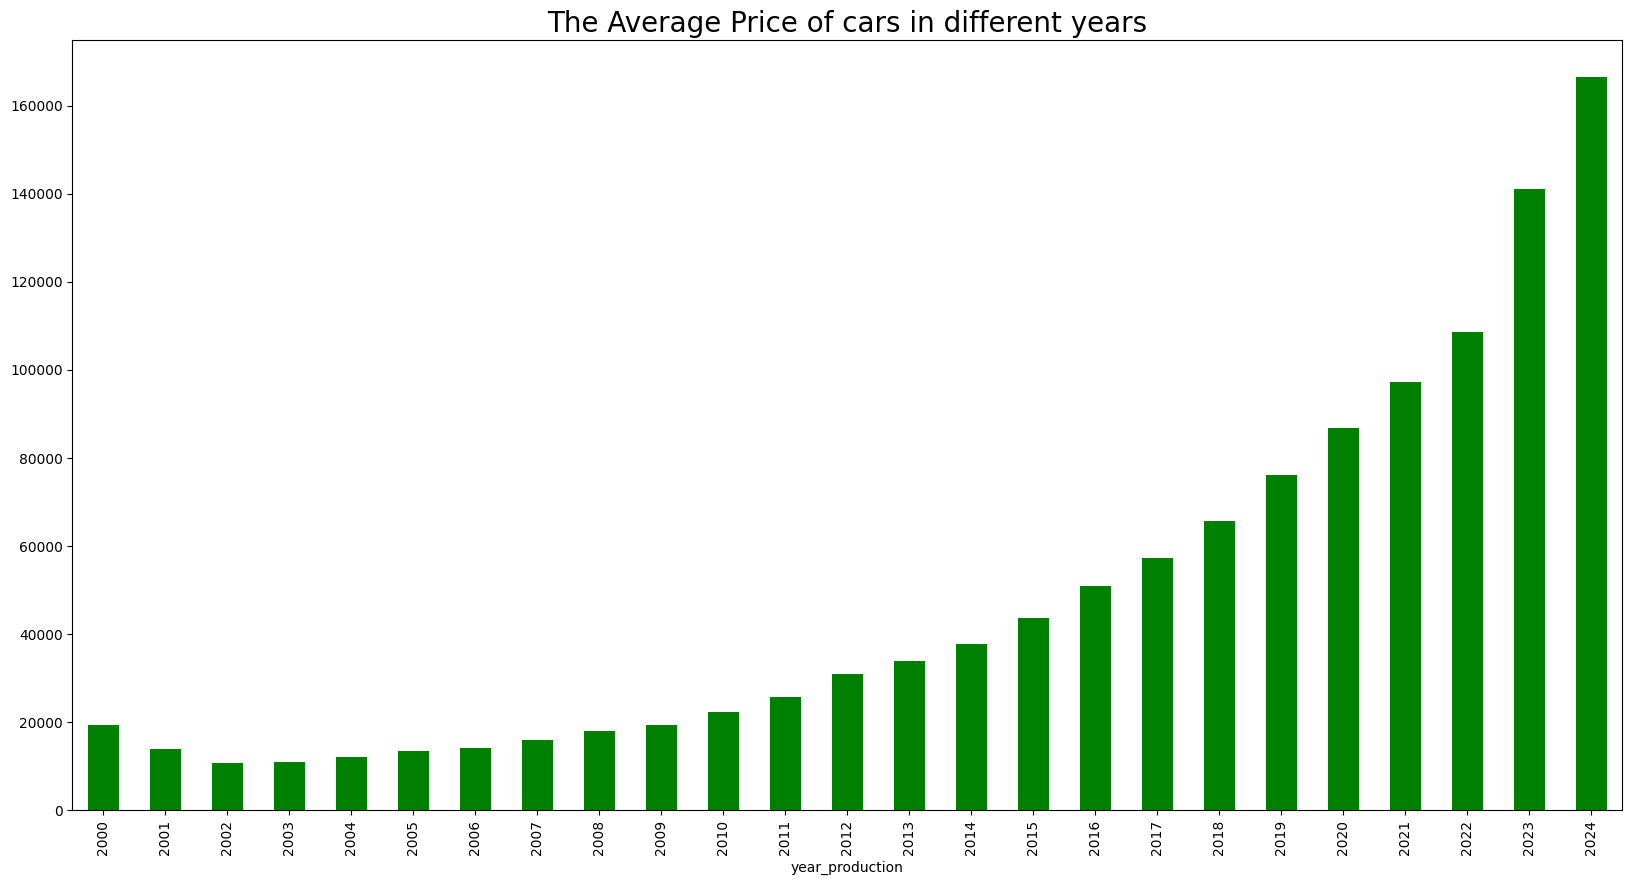

In [123]:
plt.figure(figsize = (20, 10))
df_charts.groupby('year_production')['price'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

#### Average price of cars by brands

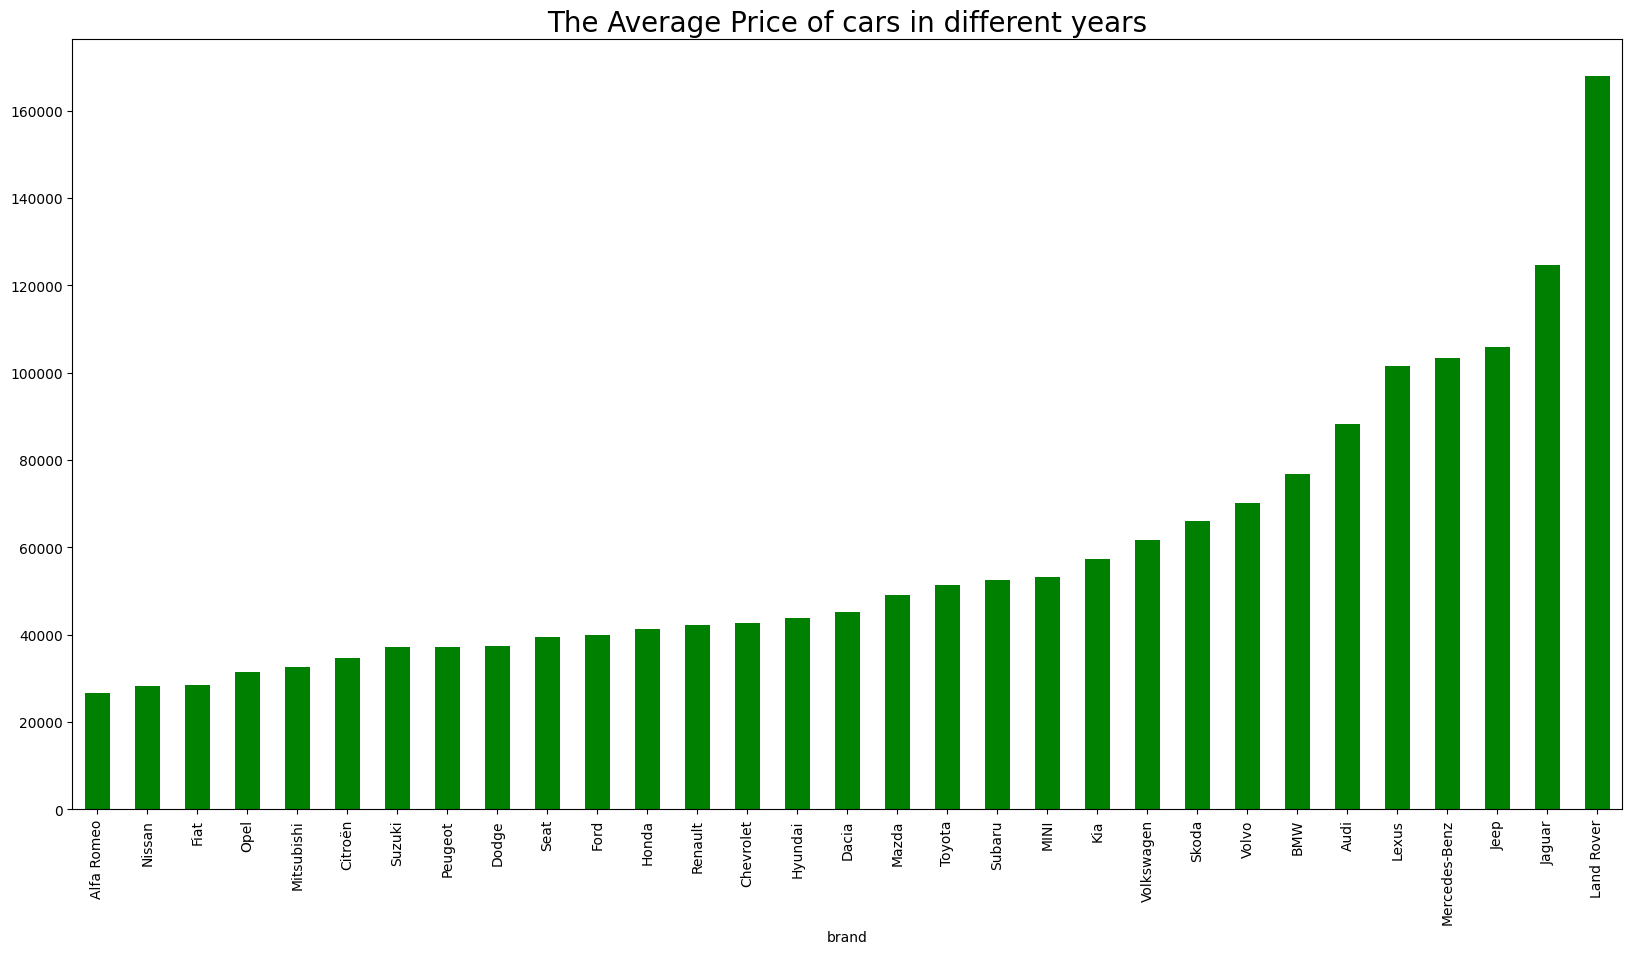

In [39]:
plt.figure(figsize=(20, 10))
df_charts.groupby('brand')['price'].mean().sort_values().plot(kind='bar', color='g')
plt.title("The Average Price of cars in different years", fontsize=20)
plt.show()

In [49]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=12)

In [53]:
selected_features_fi = select_features(df_train, 'price', method = 'feature_importance', n_features = 10)

In [54]:
print('Selected features using Feature Importance:', selected_features_fi)

Selected features using Feature Importance: ['year_production', 'power', 'engine_capacity', 'mileage', 'automatic_gearbox', 'drive_type_Front_wheel_drive', 'accident_free', 'brand_Audi', 'brand_BMW', 'brand_Mercedes-Benz']


In [55]:
selected_features_rfe = select_features(df_train, 'price', method = 'RFE', n_features = 10)

In [56]:
print('Selected features using RFE:', selected_features_rfe)

Selected features using RFE: ['year_production', 'mileage', 'engine_capacity', 'power', 'automatic_gearbox', 'accident_free', 'brand_Audi', 'drive_type_Front_wheel_drive', 'body_type_Combi', 'color_Black']


In [111]:
model_dt = DecisionTreeRegressor()
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [112]:
trained_model_dt, best_params_dt, avg_score_dt = train_model(
    df_train, 'price', selected_features_fi, model_dt, kf=3, 
    grid_search=True, param_grid=param_grid_dt
)

# Access best parameters and average score
print("Best parameters for DecisionTreeRegressor:", best_params_dt)
print("Average MAE score for DecisionTreeRegressor:", avg_score_dt)


2024-06-06 13:16:17 INFO     Starting Grid Search for hyperparameter tuning..
2024-06-06 13:16:25 INFO     Finished Grid Search for hyperparameter tuning..
2024-06-06 13:16:25 INFO     Starting Model Fitting..
2024-06-06 13:16:25 INFO     Finishing Model Fitting..
2024-06-06 13:16:25 INFO     Evaluating the model..
2024-06-06 13:16:25 INFO     Finished Model Evaluation..
Best parameters for DecisionTreeRegressor: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Average score for DecisionTreeRegressor: -324952437.8463571


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train the model
trained_model, best_params = train_model(df_train, 'target_column', ['feature_column1', 'feature_column2'], 
                                         grid_search=True, param_grid=param_grid)

# Predict using the trained model
mse, y_pred = predict_model(trained_model, df_test, 'target_column', ['feature_column1', 'feature_column2'], 
                            charts=True)

# Access best parameters
print("Best parameters:", best_params)

# Access MSE
print("Mean Squared Error:", mse)